In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

2025-04-08 13:49:57.926596: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-08 13:49:57.927088: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-08 13:49:57.929875: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-08 13:49:57.937083: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744109397.948959  544900 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744109397.95

Loads the MNIST dataset, splitting it into training and test sets (x_train, y_train, x_test, y_test).

In [2]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

Converts the labels into a 2D array to fit the one-hot encoding format.

OneHotEncoder transforms the labels into one-hot encoded vectors (e.g., label '5' becomes [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]).

In [3]:
labels_train = np.array(y_train).reshape(-1,1)
labels_test = np.array(y_test).reshape(-1,1)

In [4]:
onehot=OneHotEncoder()
onehot.fit(labels_train)
labels_train = onehot.transform(labels_train)
labels_test= onehot.transform(labels_test)

In [5]:
labels_train=labels_train.toarray()
labels_test=labels_test.toarray()

Reshapes the images to be of shape (28, 28, 1) (28x28 pixels with 1 channel for grayscale).

Normalizes the pixel values by dividing by 255 to scale them between 0 and 1.

In [6]:
images_train = np.array(x_train).reshape(60000,28,28,1)/255
images_test = np.array(x_test).reshape(10000,28,28,1)/255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, Dropout

Build Model Using the Functional API

In [20]:
#Functional API

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Model

input_layer = Input(shape=(28, 28, 1), name='input')
    
# First Convolutional Block (Conv > Conv > BatchNormalization > ReLU > MaxPooling > Dropout)
x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', name='conv2d_1_1')(input_layer)
x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', name='conv2d_1_2')(x)
x = layers.BatchNormalization(name='bn_1')(x)
x = layers.Activation('relu', name='relu_1')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='mp2d_1')(x)
x = layers.Dropout(0.2, name='drop_1')(x)

# Second Convolutional Block (Conv > Conv > BatchNormalization > ReLU > MaxPooling > Dropout)
x = layers.Conv2D(64, (3, 3), strides=(1, 1), padding='valid', name='conv2d_2_1')(x)
x = layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', name='conv2d_2_2')(x)
x = layers.BatchNormalization(name='bn_2')(x)
x = layers.Activation('relu', name='relu_2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='mp2d_2')(x)
x = layers.Dropout(0.2, name='drop_2')(x)

# Flatten > Dense > Classification
x = layers.Flatten()(x)
x = layers.Dense(100, activation='relu')(x)
output_layer = layers.Dense(10, activation='softmax')(x)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer, name='cnn_model')

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Model summary (optional)
model.summary()


Model: "cnn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1_1 (Conv2D)             │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1_2 (Conv2D)             │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_1 (BatchNormalization)       │ (None, 26, 26, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_1 (Activation)             │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mp2d_1 (MaxPooling2D)           │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_1 (Dropout)                │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2_1 (Conv2D)             │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2_2 (Conv2D)             │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_2 (BatchNormalization)       │ (None, 11, 11, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_2 (Activation)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mp2d_2 (MaxPooling2D)           │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_2 (Dropout)                │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,486 (884.71 KB)

 Trainable params: 226,294 (883.96 KB)

 Non-trainable params: 192 (768.00 B)

Uses categorical_crossentropy loss (since this is a multi-class classification problem) and adam optimizer for training.

Tracks accuracy as the evaluation metric.

Trains the model on the training data (images_train, labels_train), and validates it on the test data (images_test, labels_test).

Trains for 20 epochs with a batch size of 16.

In [21]:
history = model.fit(images_train,labels_train, validation_data=[images_test,labels_test], epochs=50, batch_size=64,verbose=1)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9060 - loss: 0.3087 - val_accuracy: 0.9830 - val_loss: 0.0474
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9822 - loss: 0.0570 - val_accuracy: 0.9895 - val_loss: 0.0351
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9868 - loss: 0.0415 - val_accuracy: 0.9828 - val_loss: 0.0533
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9888 - loss: 0.0369 - val_accuracy: 0.9908 - val_loss: 0.0315
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9903 - loss: 0.0314 - val_accuracy: 0.9897 - val_loss: 0.0352
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9920 - loss: 0.0256 - val_accuracy: 0.9876 - val_loss: 0.0425
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9920 - loss: 0.0245 - val_accuracy: 0.9924 - val_loss: 0.0233
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9936 - loss: 0.0197 - 

938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9990 - loss: 0.0030 - val_accuracy: 0.9941 - val_loss: 0.0330


In [23]:
p=model.predict(images_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [24]:
labels_predicted=np.argmax(p,1)

Displays a confusion matrix showing the true labels vs. predicted labels.

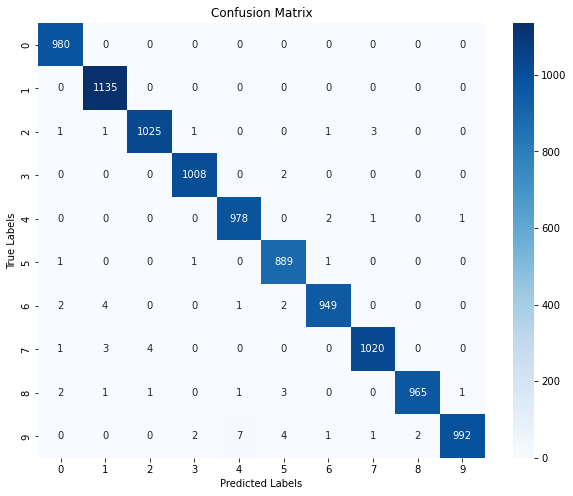

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
conf_matrix = confusion_matrix(np.argmax(labels_test, axis=1), labels_predicted)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


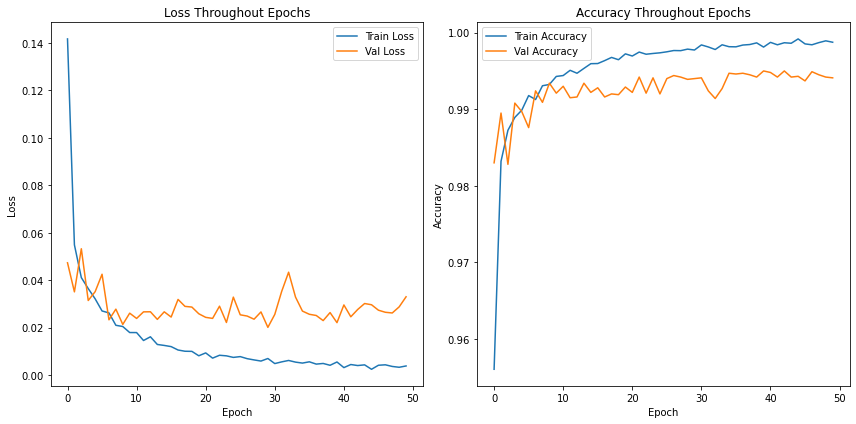

In [26]:

# Kayıpları ve doğrulukları çizmek için
plt.figure(figsize=(12, 6))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Throughout Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Throughout Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Grafik göster
plt.tight_layout()
plt.show()


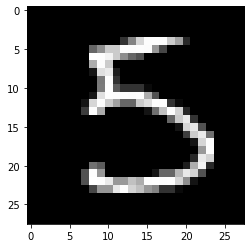

5

In [27]:
import matplotlib.pyplot as plt

ind=15
sample_image =images_test[ind,:,:,:]

pixels=sample_image.reshape((28,28,1))
plt.imshow(pixels,cmap='gray')
plt.show()

labels_predicted[ind]

In [28]:
labels_predicted[ind]

5